In [1]:
!pip freeze

absl-py==0.9.0
argon2-cffi @ file:///D:/bld/argon2-cffi_1596630110014/work
astor @ file:///home/conda/feedstock_root/build_artifacts/astor_1593610464257/work
attrs==19.3.0
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache==1.6.1
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1588608214987/work
certifi==2020.6.20
cffi @ file:///D:/bld/cffi_1595805721274/work
colorama==0.4.3
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
gast @ file:///home/conda/feedstock_root/build_artifacts/gast_1596839682936/work
google-pasta==0.2.0
grpcio @ file:///D:/bld/grpcio_1596715850903/work
h5py @ file:///D:/bld/h5py_1595110299148/work
importlib-metadata @ file:///D:/bld/importlib-metadata_1593211612489/work
ipykernel @ file:///D:/bld/ipykernel_1595447157738/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython @ file:///D:/bld/ipython_1596256513928/work
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.15

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import keras

from numpy.random import seed
seed(1)
import tensorflow
#tensorflow.random.set_seed(1)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.
d:\Miniconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\Miniconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\Miniconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\Miniconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [3]:
train_df = pd.read_csv('H1full.csv')
a=train_df.head(5)
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True).head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Interval variables
leadtime = train_df['LeadTime']
arrivaldateyear = train_df['ArrivalDateYear']
arrivaldateweekno = train_df['ArrivalDateWeekNumber']
arrivaldatedayofmonth = train_df['ArrivalDateDayOfMonth']
staysweekendnights = train_df['StaysInWeekendNights']
staysweeknights = train_df['StaysInWeekNights']
adults = train_df['Adults']
children = train_df['Children']
babies = train_df['Babies']
isrepeatedguest = train_df['IsRepeatedGuest'] 
previouscancellations = train_df['PreviousCancellations']
previousbookingsnotcanceled = train_df['PreviousBookingsNotCanceled']
bookingchanges = train_df['BookingChanges']
agent = train_df['Agent']
company = train_df['Company']
dayswaitinglist = train_df['DaysInWaitingList']
adr = train_df['ADR']
rcps = train_df['RequiredCarParkingSpaces']
totalsqr = train_df['TotalOfSpecialRequests']

In [5]:
y1 = np.array(adr)

In [6]:
# Categorical variables
IsCanceled = train_df['IsCanceled']
arrivaldatemonth = train_df.ArrivalDateMonth.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=train_df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)

In [7]:
x1 = np.column_stack((IsCanceled,countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateweekno))
x1 = sm.add_constant(x1, prepend=True)

In [8]:
#Variables
y1=np.reshape(y1, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x1))
xscale=scaler_x.transform(x1)
print(scaler_y.fit(y1))
yscale=scaler_y.transform(y1)

MinMaxScaler()
MinMaxScaler()


In [9]:
y1.shape

(40060, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [11]:
y_train.shape

(30045, 1)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_130 (Dense)            (None, 80)                720       
_________________________________________________________________
dense_131 (Dense)            (None, 5)                 405       
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 6         
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Train on 24036 samples, validate on 6009 samples
Epoch 1/70
24036/24036 - 3s - loss: 0.0124 - mean_squared_error: 0.0124 - mean_absolute_error: 0.0844 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0701
Epoch 2/70
2

Epoch 40/70
24036/24036 - 2s - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0504 - val_loss: 0.0047 - val_mean_squared_error: 0.0047 - val_mean_absolute_error: 0.0484
Epoch 41/70
24036/24036 - 2s - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0503 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - val_mean_absolute_error: 0.0486
Epoch 42/70
24036/24036 - 2s - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0500 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - val_mean_absolute_error: 0.0495
Epoch 43/70
24036/24036 - 2s - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0500 - val_loss: 0.0047 - val_mean_squared_error: 0.0047 - val_mean_absolute_error: 0.0485
Epoch 44/70
24036/24036 - 2s - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0502 - val_loss: 0.0054 - val_mean_squared_error: 0.0054 - val_mean_absolute_error: 0.0539
Epoch 45/70
24036/24036 - 2s - loss: 0.0049 - mean_squa

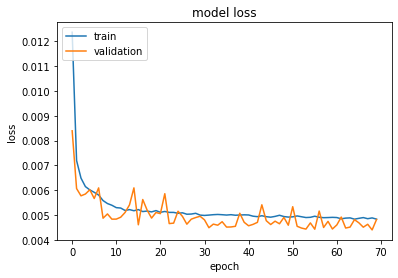

In [47]:
from keras.optimizers import SGD

 
 


model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='elu'))
#model.add(Dense(80, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(8, kernel_initializer='lecun_normal', activation='selu'))
model.add(Dense(5, kernel_initializer='lecun_normal', activation='selu'))


model.add(Dense(1, activation='linear'))
model.summary()

#model.compile(  optimizer=opt,loss='mse', metrics=['mse','mae']) #optimizer='adam', 

opt = keras.optimizers.SGD( )
#opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#model.compile(optimizer=opt)
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


history=model.fit(X_train, y_train, epochs=70, batch_size=25,  verbose=2, validation_split=0.2,shuffle=True)
predictions = model.predict(X_test)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
h2data = pd.read_csv('H2full.csv')
a=h2data.head()
a

In [ ]:
t_leadtime = h2data['LeadTime'] #1
t_arrivaldateyear = h2data['ArrivalDateYear']
t_arrivaldateweekno = h2data['ArrivalDateWeekNumber']
t_arrivaldatedayofmonth = h2data['ArrivalDateDayOfMonth']
t_staysweekendnights = h2data['StaysInWeekendNights'] #2
t_staysweeknights = h2data['StaysInWeekNights'] #3
t_adults = h2data['Adults'] #4
t_children = h2data['Children'] #5
t_babies = h2data['Babies'] #6
t_isrepeatedguest = h2data['IsRepeatedGuest'] #11
t_previouscancellations = h2data['PreviousCancellations'] #12
t_previousbookingsnotcanceled = h2data['PreviousBookingsNotCanceled'] #13
t_bookingchanges = h2data['BookingChanges'] #16
t_agent = h2data['Agent'] #18
t_company = h2data['Company'] #19
t_dayswaitinglist = h2data['DaysInWaitingList'] #20
t_adr = h2data['ADR'] #22
t_rcps = h2data['RequiredCarParkingSpaces'] #23
t_totalsqr = h2data['TotalOfSpecialRequests'] #24

In [ ]:
# Categorical variables
t_IsCanceled = h2data['IsCanceled']
t_arrivaldatemonth = h2data.ArrivalDateMonth.astype("category").cat.codes
t_arrivaldatemonthcat = pd.Series(t_arrivaldatemonth)
t_mealcat=h2data.Meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=h2data.DistributionChannel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=h2data.ReservedRoomType.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=h2data.AssignedRoomType.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=h2data.ReservationStatus.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)

In [ ]:
atest = np.column_stack((t_IsCanceled,t_countrycat,t_marketsegmentcat,t_deposittypecat,t_customertypecat,t_rcps,t_arrivaldateweekno))
atest = sm.add_constant(atest, prepend=True)
btest = t_adr
btest=btest.values

In [ ]:
np.shape(atest)

In [ ]:
scaler_atest = MinMaxScaler()
print(scaler_atest.fit(atest))
ascale=scaler_atest.transform(atest)

In [ ]:
np.shape(ascale)

In [ ]:
bpred = model.predict(ascale)
bpred

In [ ]:
bpred = scaler_y.inverse_transform(bpred)

In [ ]:
bpred

In [ ]:
btest

In [ ]:
np.shape(btest)

In [ ]:
np.shape(bpred)

In [ ]:
bpred=np.reshape(bpred, (79330,)) 

In [ ]:
np.shape(bpred)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
mean_absolute_error(btest, bpred)

In [ ]:
mean_squared_error(btest, bpred)

In [ ]:
math.sqrt(mean_squared_error(btest, bpred))

In [ ]:
np.mean(btest)

In [ ]:
np.mean(bpred)

In [ ]:
np.max(btest)